### PCA 개요 

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

columns = ['sepal_length','sepal_width','petal_length','petal_width']
df_iris = pd.DataFrame(iris.data , columns=columns)
df_iris['target']=iris.target
df_iris.head(3)

In [ ]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = df_iris[df_iris['target']==i]['sepal_length']
    y_axis_data = df_iris[df_iris['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(df_iris)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

In [ ]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
df_iris_pca = pd.DataFrame(iris_pca,columns=pca_columns)
df_iris_pca['target']=iris.target
df_iris_pca.head(3)

In [ ]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = df_iris_pca[df_iris_pca['target']==i]['pca_component_1']
    y_axis_data = df_iris_pca[df_iris_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print(scores)

In [ ]:
pca_X = df_iris_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print(scores_pca)

# PCA 적용 - credit card 데이터 세트 

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

#df = pd.read_excel('./input/credit_card.xls', sheet_name='Data')
df = pd.read_excel('./input/credit_card.xls')

print(df.shape);

df.head(5)

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)

In [5]:
y_target = df['default']

X_features = df.drop('default', axis=1)

In [7]:
df.keys()

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [6]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


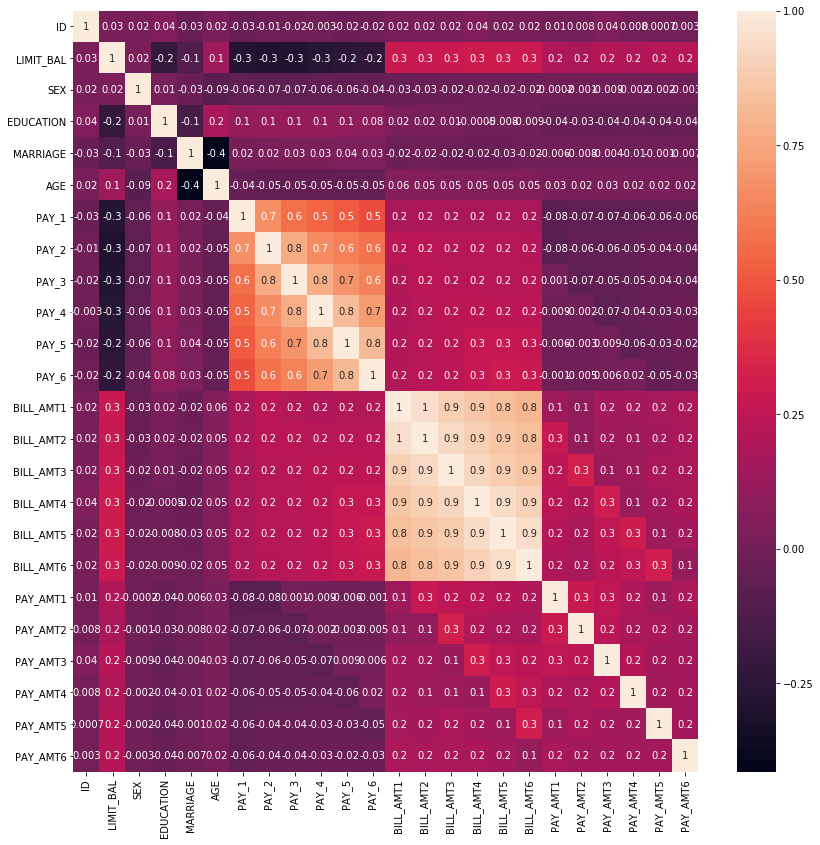

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()

plt.figure(figsize=(14,14))

sns.heatmap(corr, annot=True, fmt='.1g')

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:',cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled) 

print('PCA Component별 변동성:', pca.explained_variance_ratio_)


대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


In [12]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)

scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))


CV=3 인 경우의 개별 Fold세트별 정확도: [0.257  0.8209 0.784 ]
평균 정확도:0.6206


In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.775  0.7986 0.8034]
PCA 변환 데이터 셋 평균 정확도:0.7923
